Warning in <TCanvas::Constructor>: Deleting canvas with same name: 
Info in <TCanvas::Print>: png file ComparisionPlots4.png has been created


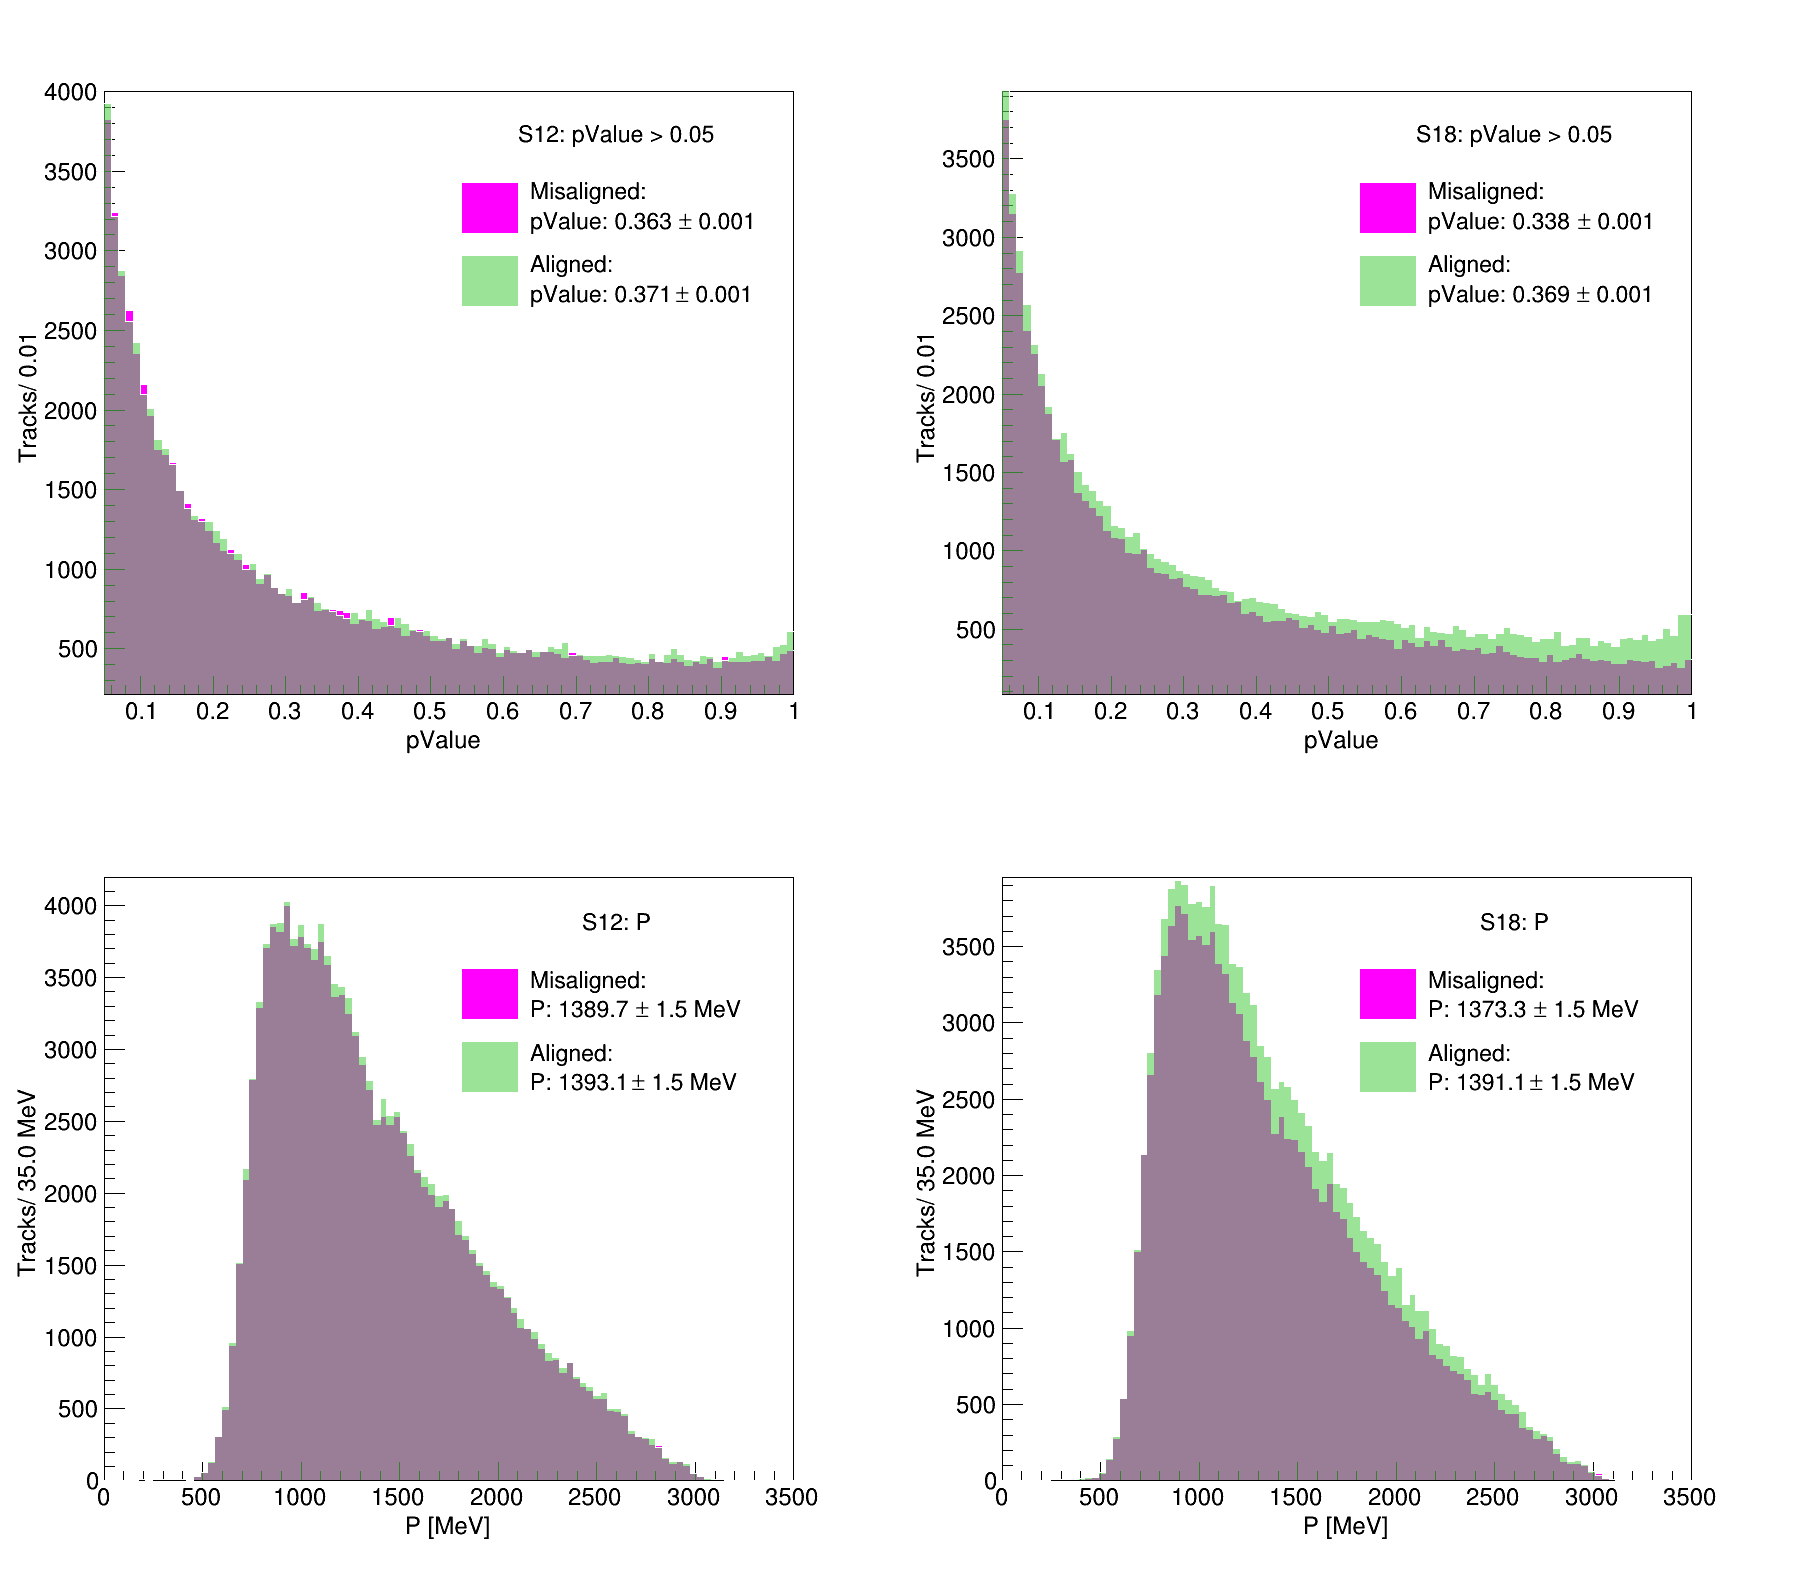

In [49]:
import sys
sys.path.append("/usr/local/Cellar/root/6.14.04_2/lib/root")
from ROOT import TFile, TStyle, TCanvas, gStyle, TF1, gROOT
import matplotlib.pyplot as plt #for plotting 
import numpy as np  # smart arrays 
import itertools # smart lines 
import argparse, sys
from math import log10, floor
from matplotlib.ticker import MaxNLocator
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from matplotlib.cbook import get_sample_data
from matplotlib._png import read_png
import subprocess
def round_sig(x, sig=2):
	return round(x, sig-int(floor(log10(abs(x))))-1)

from ROOT import TH1F, TH2F, TF1, TCanvas, TFile, gStyle, TPaveText, TLegend
from decimal import *
round_to = 3 
getcontext().prec = round_to

#Define constant paths and labels 
path = "TrackerAlignment/Tracks/"
TfileName = "/TrackerAlignment.root"
stationName = ["S12", "S18"]
scr_nominal= "/Users/gleb/software/alignTrack/mpIIDESY/defDig_defTrack_Iter1/"
scr_shift = "/Users/gleb/software/alignTrack/mpIIDESY/defDig_defTrack_Iter4/"

#Containers to store histograms in orders as the names 
names = ["Misaligned", "Aligned"]
stateN=len(names)

colors = [6, 8] #purple, green 
styles = [3001, 3002]

plotName = ["pValue", "P"]
units = ["", "MeV"]


#Make new canvas for plots 
c = TCanvas("", "", 1800, 1600)
c.Divide(2,2)
#Keep legend, histots and TFiles in scope 
legendArray=[]
histArray=[]
fileArray=[]

i_total=0 # canvas id counter 
for i_plot in range(0, len(plotName)):
    for i_station in range(0, len(stationName)):

        #Open TFiles
        scrFile_nominal = TFile.Open(scr_nominal+stationName[i_station]+TfileName)
        scrFile_shift = TFile.Open(scr_shift+stationName[i_station]+TfileName)
        fileName = [scrFile_nominal, scrFile_shift] # nominal (0) and global shift (1)  
        fileArray.append(fileName)

        c.cd(i_total+1)
        legend =  TLegend(0.5,0.6,0.88,0.89)
        legendArray.append(legend) # stroe all to keep in scope 
        for i_state in range(0, stateN):
           
            #Get the TH1F 
            plot = fileName[i_state].Get(str(path+plotName[i_plot])) 
            histArray.append(plot)
            plot.Rebin(2)
            
            if(i_plot==0):
                # set the cut on p-values 
                plot.GetXaxis().SetRangeUser(0.05, 1) 
                extra_header_string = ": pValue > 0.05"
                mean=Decimal(plot.GetMean())/Decimal(1)
                mean_error = round(Decimal(plot.GetMeanError())/Decimal(1),3)
                plot.GetXaxis().SetTitle(plotName[i_plot]+" "+units[i_plot]+"")
                
            
            if(i_plot==1):
                extra_header_string = ": P"
                mean=round(plot.GetMean(), 1)
                mean_error = round(plot.GetMeanError(),1 )
                plot.GetXaxis().SetTitle(plotName[i_plot]+" ["+units[i_plot]+"]")
            
            plot.SetLineColor(0)
            plot.SetFillStyle(1)
            plot.GetXaxis().CenterTitle()
            plot.GetXaxis().SetTitleOffset(1.1)
            binN=plot.GetBinWidth(1)
            plot.GetYaxis().SetTitle("Tracks/ "+str(binN)+" "+units[i_plot])
            plot.GetYaxis().CenterTitle()
            plot.GetYaxis().SetTitleOffset(1.6)
            
            
            if (i_state == 0):
                plot.SetFillColorAlpha(colors[i_state], 1.0)
                plot.Draw("")
                
            else:
                plot.SetFillColorAlpha(colors[i_state], 0.6)
                plot.Draw("same")
            
            #fill legend once per state      
            legenValue1 = "#splitline{"+str(names[i_state])+":}{"+plotName[i_plot]+": "+str(mean)+" #pm "+str(mean_error)+" "+units[i_plot]+"}"
            legend.AddEntry(plot, str(legenValue1), "f")
            legend.SetHeader(stationName[i_station]+extra_header_string, "C")
        
        #draw legend once per canvas 
        legend.Draw("same")
        i_total+=1
        gStyle.SetOptStat(0) 
        gStyle.SetOptFit(0)
        gStyle.SetLegendBorderSize(0)
        gStyle.SetLegendTextSize(0.033)

c.Draw()
c.Print("ComparisionPlots"+str(i_total)+".png")
